In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pywt

%matplotlib inline

In [2]:
SMALL_SIZE = 17
MEDIUM_SIZE = 18
BIGGER_SIZE = 19

plt.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "pgf.texsystem": 'pdflatex',  # default is xetex
    }
)

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize

In [3]:
nscenarios = 3

In [4]:
undecimated = "u"
radiotelescope = "jvla_red"

In [5]:
scenario_1_means = np.load(undecimated + "wavelet_" + radiotelescope + "_scenario_1_means.npy")
scenario_1_stds = np.load(undecimated + "wavelet_" + radiotelescope + "_scenario_1_stds.npy")

scenario_2_means = np.load(undecimated + "wavelet_" + radiotelescope + "_scenario_2_means.npy")
scenario_2_stds = np.load(undecimated + "wavelet_" + radiotelescope + "_scenario_2_stds.npy")

scenario_3_means = np.load(undecimated + "wavelet_" + radiotelescope + "_scenario_3_means.npy")
scenario_3_stds = np.load(undecimated + "wavelet_" + radiotelescope + "_scenario_3_stds.npy")

In [6]:
scenario_1_means.shape

(4, 38)

In [7]:
family_per_scenario = ["db", "haar", "db"]

In [8]:
wavelist_per_scenario = [pywt.wavelist(i, kind="discrete") for i in family_per_scenario]

In [9]:
# Getting minimum AICs
idx_sc1 = np.argmin(scenario_1_means[2])
idx_sc2 = np.argmin(scenario_2_means[2])
idx_sc3 = np.argmin(scenario_3_means[2])

In [10]:
print(
    "Scenario 1: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        wavelist_per_scenario[0][idx_sc1], scenario_1_means[2, idx_sc1], scenario_1_stds[2, idx_sc1]
    )
)
print(
    "Scenario 2: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        wavelist_per_scenario[1][idx_sc2], scenario_2_means[2, idx_sc2], scenario_2_stds[2, idx_sc2]
    )
)
print(
    "Scenario 3: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        wavelist_per_scenario[2][idx_sc3], scenario_3_means[2, idx_sc3], scenario_3_stds[2, idx_sc3]
    )
)

Scenario 1: Best AIC Wavelet family db34 : -19931.31 \pm 204.32
Scenario 2: Best AIC Wavelet family haar : -20023.07 \pm 141.27
Scenario 3: Best AIC Wavelet family db38 : -19365.93 \pm 274.70


In [11]:
print(
    "Scenario 1: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        wavelist_per_scenario[0][idx_sc1], scenario_1_means[3, idx_sc1], scenario_1_stds[3, idx_sc1]
    )
)
print(
    "Scenario 2: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        wavelist_per_scenario[1][idx_sc2], scenario_2_means[3, idx_sc2], scenario_2_stds[3, idx_sc2]
    )
)
print(
    "Scenario 3: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        wavelist_per_scenario[2][idx_sc3], scenario_3_means[3, idx_sc3], scenario_3_stds[3, idx_sc3]
    )
)

Scenario 1: Best BIC Wavelet family db34 : -19110.59 \pm 660.77
Scenario 2: Best BIC Wavelet family haar : -19323.28 \pm 453.82
Scenario 3: Best BIC Wavelet family db38 : -17275.06 \pm 914.83


In [12]:
print(
    "Scenario 1: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        wavelist_per_scenario[0][idx_sc1], scenario_1_means[0, idx_sc1], scenario_1_stds[0, idx_sc1]
    )
)
print(
    "Scenario 2: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        wavelist_per_scenario[1][idx_sc2], scenario_2_means[0, idx_sc2], scenario_2_stds[0, idx_sc2]
    )
)
print(
    "Scenario 3: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        wavelist_per_scenario[2][idx_sc3], scenario_3_means[0, idx_sc3], scenario_3_stds[0, idx_sc3]
    )
)

Scenario 1: Best PSNR Wavelet family db34 : 123.11 \pm 6.22
Scenario 2: Best PSNR Wavelet family haar : 9.49 \pm 0.76
Scenario 3: Best PSNR Wavelet family db38 : 117.38 \pm 6.58


In [13]:
print(
    "Scenario 1: Best RMSE Wavelet family {0} : ({1:.2f} \pm {2:.2f})*1e-5".format(
        wavelist_per_scenario[0][idx_sc1], scenario_1_means[1, idx_sc1] * 10**5,
        scenario_1_stds[1, idx_sc1] * 10**5
    )
)
print(
    "Scenario 2: Best RMSE Wavelet family {0} : ({1:.2f} \pm {2:.2f})*1e-5".format(
        wavelist_per_scenario[1][idx_sc2], scenario_2_means[1, idx_sc2] * 10**5,
        scenario_2_stds[1, idx_sc2] * 10**5
    )
)
print(
    "Scenario 3: Best RMSE Wavelet family {0} : ({1:.2f} \pm {2:.2f})*1e-5".format(
        wavelist_per_scenario[2][idx_sc3], scenario_3_means[1, idx_sc3] * 10**5,
        scenario_3_stds[1, idx_sc3] * 10**5
    )
)

Scenario 1: Best RMSE Wavelet family db34 : (72.47 \pm 1.96)*1e-5
Scenario 2: Best RMSE Wavelet family haar : (71.29 \pm 1.41)*1e-5
Scenario 3: Best RMSE Wavelet family db38 : (74.60 \pm 2.13)*1e-5


In [14]:
scenario_1_means.shape

(4, 38)

In [15]:
len(pywt.wavelist("db", kind="discrete"))

38

In [16]:
len(wavelist_per_scenario[0])

38

In [17]:
delta_basis_means = np.load("deltaf_jvla_scenarios_means.npy")
delta_basis_stds = np.load("deltaf_jvla_scenarios_stds.npy")

ValueError: 'yerr' must not contain negative values

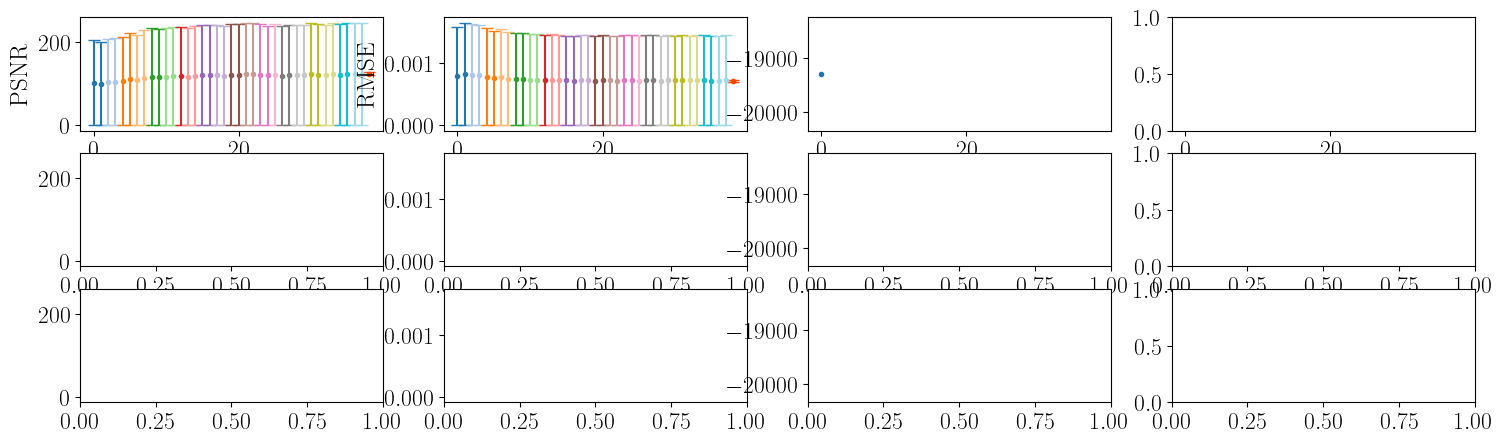

In [18]:
names = ["PSNR", "RMSE", "AIC", "BIC"]
fig, ax = plt.subplots(nrows=3, ncols=len(names), sharey='col', sharex='row', figsize=(18, 5))
cmap1 = plt.get_cmap('tab20')
cmap2 = plt.get_cmap('tab20')
cmap3 = plt.get_cmap('tab20b')
cmaps = [cmap1, cmap2, cmap3]

for i in range(3):
    wavelets = wavelist_per_scenario[i]
    nwavelets = len(wavelets)
    id_wav = np.arange(0, nwavelets)
    colors = [cmaps[i](cmap) for cmap in np.linspace(0, 1, nwavelets)]
    for j in range(len(names)):
        for k in range(nwavelets):
            if i == 0:
                ax[i, j].plot(id_wav[k], scenario_1_means[j, k], label=wavelets[k], color=colors[k])
                ax[i, j].errorbar(
                    id_wav[k],
                    scenario_1_means[j, k],
                    yerr=scenario_1_means[j, k],
                    fmt='.',
                    capsize=4,
                    color=colors[k]
                )
            elif i == 1:
                ax[i, j].plot(id_wav[k], scenario_2_means[j, k], label=wavelets[k], color=colors[k])
                ax[i, j].errorbar(
                    id_wav[k],
                    scenario_2_means[j, k],
                    yerr=scenario_2_means[j, k],
                    fmt='.',
                    capsize=4,
                    color=colors[k]
                )
            else:
                ax[i, j].plot(id_wav[k], scenario_3_means[j, k], label=wavelets[k], color=colors[k])
                ax[i, j].errorbar(
                    id_wav[k],
                    scenario_3_means[j, k],
                    yerr=scenario_3_means[j, k],
                    fmt='.',
                    capsize=4,
                    color=colors[k]
                )
                ax[i, j].set_xlabel("Wavelet")
            ax[i, j].set_ylabel(names[j])
        if i == 2:
            ax[i, j].plot(id_wav[-1] + 1, delta_basis_means[i, j], label="delta", color="orangered")
        else:
            ax[i, j].plot(id_wav[-1] + 1, delta_basis_means[i, j], color="orangered")
        ax[i, j].errorbar(
            id_wav[-1] + 1,
            delta_basis_means[i, j],
            yerr=delta_basis_stds[i, j],
            fmt='.',
            capsize=4,
            color="orangered"
        )

#for i in range(3):
#    for j in range(len(names)):
#        for k in range(scenarios_means.shape[2]):
#            ax[i,j].plot(_id[k], scenarios_means[i,j,k], label=use_wavelet[k], color=colors[k])
#            ax[i,j].errorbar(_id[k], scenarios_means[i,j,k], yerr = scenarios_stds[i,j,k], fmt ='.', capsize=4, color=colors[k])
#            #if names[f] == "PSNR" and sc==3:
#            #ax[sc-1,f].legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
#            ax[i,j].set_ylabel(names[j])
#        if i==2:
#            ax[i,j].set_xlabel("Wavelet")

#for k in range(len(idx_coif)):
#    for i in range(scenarios_means.shape[0]):
#        for j in range(len(names)):
#            ax[i,j].axvline(x = idx_coif[k], color = 'k', linestyle="--", alpha=0.8)

#for i in range(scenarios_means.shape[0]):
#ax[i,1].set_ylim([0,0.0015])
#ax[i,2].set_ylim([-25000,-20000])
#ax[i,3].set_ylim([-25000,-20000])

#ax[i,2].set_ylim([-25000,-15000]) #undecimated
#ax[i,3].set_ylim([-25000,17500]) #undecimated

ofile_name = "family_" + undecimated + "wavelets_" + radiotelescope + ".pdf"
#fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
#ax[len(scenarios)-1, 1].legend(loc='upper left', bbox_to_anchor=[1.0, -0.5], ncol=19, fancybox=True, shadow=True, title="Wavelets")
h, l = ax[0, 0].get_legend_handles_labels()
h1, l1 = ax[1, 0].get_legend_handles_labels()
h2, l2 = ax[2, 0].get_legend_handles_labels()
h = h + h2
l = l + l2
legend = fig.legend(
    h,
    l,
    loc='lower center',
    ncol=10,
    fancybox=True,
    bbox_to_anchor=[0.52, -0.375],
    shadow=True,
    title="Wavelet families"
)
# fig.suptitle("Delta dirac basis + Undecimated Wavelet")
fig.tight_layout()
if os.path.isfile(ofile_name):
    os.remove(ofile_name)  # Opt.: os.system("rm "+strFile)
fig.savefig(ofile_name, dpi=100, bbox_inches='tight')  #